In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
dir_path='../control_transition'
sys.path.append(dir_path)

In [3]:
from plot_utils import *

In [4]:
from importlib import reload


import plot_utils
reload(plot_utils)
from plot_utils import *

In [5]:
from diffusion_utils import *

In [6]:
from importlib import reload


import diffusion_utils
reload(diffusion_utils)
from diffusion_utils import *

# API

In [6]:
data=load_json('MPS_(0,1)_L8_pctrl0.500_pproj0.000_s1_coherence.json')

In [30]:
data.keys()

dict_keys(['args', 'coh_mat', 'fdw'])

In [34]:
np.array(data['fdw']).shape

(9,)

In [36]:
np.array(data['coh_mat']).sum()

20.79331705538244

In [33]:
np.array(data['coh_mat']).shape

(9, 9)

In [6]:
L=60
params_list=[
# ({'nu':0,'de':1,},{'L':np.arange(10,31,10),'p_ctrl':[0.4,.5,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(0,20)}),
# ({'nu':0,'de':1,},{'L':np.arange(10,31,10),'p_ctrl':[.5,0.4,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(0,2000)}),
# ({'nu':0,'de':1,},{'s':np.arange(0,2000),'L':[L],'p_ctrl':[0.4,0.45,0.47,0.49,0.5,0.51,0.53,0.55,0.6],'p_proj':np.linspace(0.0,0.0,1),}),
# ({'nu':0,'de':1,},{'s':np.arange(0,2000),'L':[L],'p_ctrl':[0.4,0.45,0.47,0.49,0.5,0.51,0.53,0.55,0.6],'p_proj':np.linspace(0.0,0.0,1),}),

# ({'nu':0,'de':1},{'s':np.arange(0,2000),'L':[L],'p_ctrl':[0.4,0.45,0.47,0.49,0.5,0.51,0.53,0.55,0.6],'p_proj':np.linspace(0.0,0.0,1),'maxbond':[30,60,120]}),
# ({'nu':0,'de':1},{'s':np.arange(0,2000),'L':[L],'p_ctrl':[0.5],'p_proj':np.linspace(0.0,0.0,1),'maxbond':[30,60,120,200],'t':[2]}),

# ({'nu':0,'de':1},{'s':np.arange(0,2000),'L':[L],'p_ctrl':[0.5,0.51,0.53,0.55,0.6],'p_proj':np.linspace(0.0,0.0,1),'maxbond':[120,400,1200,4000],'t':[2]}),
# 0.4,0.45,
# 
# ({'nu':0,'de':1},{'s':np.arange(00000,2000),'L':[L],'p_ctrl':[0.45,0.47,0.49,0.5,0.51,0.53,0.55,0.6,0.65,0.7,0.8,0.9],'p_proj':np.linspace(0.0,0.0,1),'maxbond':[30,60,120,400,1200,4000],'t':[2]}),
({'nu':0,'de':1},{'s':np.arange(00000,2000),'L':[L],'p_ctrl':[0.5,0.51,0.53,0.55,0.6],'p_proj':np.linspace(0.0,0.0,1),'maxbond':[4000],'t':[2]}),
# 0.65,0.7,0.8,0.9
# 30,60,120,400,1200,4000
# ({'nu':0,'de':1,},{'p_ctrl':np.linspace(0.4,0.6,21),'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(2000),'L':np.arange(20,61,10)}),
# ({'nu':0,'de':1,},{'p_ctrl':[0.4,0.5,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(10000),'L':np.arange(20,61,10)}),
]

In [7]:
!rm params_CT_MPS_0_coherence_L60.txt

rm: cannot remove 'params_CT_MPS_0_coherence_L60.txt': No such file or directory


In [8]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        # fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_mb{maxbond}_s{s}_coherence.json',
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_mb{maxbond}_t{t:.1f}_s{s}_coherence.json',
        # fn_dir_template=f'./MPS_0-1_coherence_x01_L{L}_maxbond60',
        fn_dir_template=f'./MPS_0-1_coherence_x01_L{L}',
        # fn_dir_template=f'./MPS_0-1_coherence_x01_L{L}_randinit',
        # fn_dir_template=f'./MPS_0-1_coherence_x01_L{L}_dense',
        # _maxbond30
        input_params_template='{p_ctrl:.3f},{p_proj:.3f},{L},{maxbond},{t:.1f},{s}',
        load_data=load_json,
        filename=f'params_CT_MPS_0_coherence_L{L}.txt',
        filelist=None,
        load=False,
        data_dict=None,
    )

generate_params: 100%|██████████| 10000/10000 [00:00<00:00, 37383.62it/s]


In [9]:
with open(f'params_CT_MPS_0_coherence_L{L}.txt','r') as f:
    # lines=f.readlines()
    linewidth=1
    count=0
    total_string = []
    string = ''
    for line in f:
        string = string + ',' + line.strip()
        count+=1
        if count>=linewidth:
            count=0
            total_string.append(string[1:])
            string= ''

with open(f'params_CT_MPS_0_coherence_L{L}.txt','w') as f:
    f.write('\n'.join(total_string))

In [145]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        # fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_s{s}_coherence.json',
        # fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_mb{maxbond}_s{s}_coherence.json',
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_mb{maxbond}_t{t:.1f}_s{s}_coherence.json',
        fn_dir_template='./',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        # data_dict_file='xj({nu},{de})_coherence.pickle', 
        # zip_fn='./MPS_0-1_coherence.zip'
        # zip_fn=f'./MPS_0-1_coherence_x01_L{L}.zip'
        # zip_fn=f'./MPS_0-1_coherence_x01_L{L}_maxbond30.zip'
        # zip_fn=f'./MPS_0-1_coherence_x01_L{L}_bak.zip'
        zip_fn=f'./MPS_0-1_coherence_x01_L{L}.zip'
        # zip_fn=f'./MPS_0-1_coherence_x01_L{L}_randinit.zip'
        # zip_fn=f'./MPS_0-1_coherence_x01_L{L}_dense.zip'
    )
# df_MPS_0_T=convert_pd(data_MPS_0_T_dict,names=['Metrics','p_ctrl','L','p_proj','maxbond','seed'])
df_MPS_0_T=convert_pd(data_MPS_0_T_dict,names=['Metrics','t','p_ctrl','L','p_proj','maxbond','seed'])

generate_params: 100%|██████████| 144000/144000 [00:04<00:00, 35547.26it/s]


In [146]:
# L=30
# maxbond=30
t=2
# coh_mean = {}
# coh_meas_error = {}
# coh_fluc_error = {}
# abs_mps = {}
# abs_mps_error={}
# total_est_error={}
# est_error={}
# ranks={}

# for p in params_list[0][1]['p_ctrl']:
for p in df_MPS_0_T.index.get_level_values('p_ctrl').unique().sort_values():
# for p in [0.5]:
    # This filter out the largest bond dim
    df_=df_MPS_0_T.xs('coh_mat',level='Metrics').xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj')
    df_reset=df_.reset_index()
    idx=df_reset.groupby('seed')['maxbond'].idxmax()
    coh = df_reset.loc[idx]
    mask = (coh['observations']<2**L)
    abs_mps[L,p]=np.sqrt(np.stack(coh['observations'][mask])+1)

    df_=df_MPS_0_T.xs('ranks',level='Metrics').xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj')
    df_reset=df_.reset_index()
    idx=df_reset.groupby('seed')['maxbond'].idxmax()
    ranks[L,p] = df_reset.loc[idx]
    ranks[L,p] = ranks[L,p][mask]


    df_=df_MPS_0_T.xs('errors',level='Metrics').xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj')
    df_reset=df_.reset_index()
    idx=df_reset.groupby('seed')['maxbond'].idxmax()
    abs_mps_error[L,p]=df_reset.loc[idx]
    abs_mps_error[L,p] = abs_mps_error[L,p][mask]

    est_error[L,p] =  2 * abs_mps[L,p] * np.hstack(abs_mps_error[L,p]['observations']) * 2**L

    coh_meas_error[L,p] = np.sqrt(np.sum(est_error[L,p]**2))/(est_error[L,p].shape[0])
    coh_mean[L,p]=coh['observations'][mask].mean()
    # coh_mean[L,p]=coh['observations'][(coh['observations']>2**-20)].median()
    coh_fluc_error[L,p]=coh['observations'][mask].std()/np.sqrt(coh.shape[0])
    total_est_error[L,p]=(coh_meas_error[L,p]**2+coh_fluc_error[L,p]**2)**0.5
    






In [147]:
with open(f'coherence_MPS_err.pickle','wb') as f:
    pickle.dump([coh_mean,coh_meas_error,coh_fluc_error, abs_mps, abs_mps_error, total_est_error, est_error, ranks],f)

In [71]:
with open(f'coherence_MPS_err_median.pickle','wb') as f:
    pickle.dump([coh_mean,coh_meas_error,coh_fluc_error, abs_mps, abs_mps_error, total_est_error, est_error, ranks],f)

In [77]:
# L=30
# maxbond=30
t=2
coh_all = {}
coh_mean = {}
coh_meas_error = {}
coh_fluc_error = {}
abs_mps = {}
abs_mps_error={}
total_est_error={}
est_error={}
ranks={}
for p in params_list[0][1]['p_ctrl']:
    # This filter out the largest bond dim
    df_=df_MPS_0_T.xs('coh_mat',level='Metrics').xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj')
    df_reset=df_.reset_index()
    idx=df_reset.groupby('seed')['maxbond'].idxmax()
    coh_all[L,p] = df_reset.loc[idx]

    # abs_mps[L,p]=np.sqrt(np.stack(coh['observations'])+1)

    # df_=df_MPS_0_T.xs('ranks',level='Metrics').xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj')
    # df_reset=df_.reset_index()
    # idx=df_reset.groupby('seed')['maxbond'].idxmax()
    # ranks[L,p] = df_reset.loc[idx]


    # df_=df_MPS_0_T.xs('errors',level='Metrics').xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj')
    # df_reset=df_.reset_index()
    # idx=df_reset.groupby('seed')['maxbond'].idxmax()
    # abs_mps_error[L,p]=df_reset.loc[idx]

    # est_error[L,p] =  2 * abs_mps[L,p] * np.hstack(abs_mps_error[L,p]['observations']) * 2**L

    # total_est_error[L,p] = np.sqrt(np.sum(est_error[L,p]**2))/(est_error[L,p].shape[0])
    # coh_meas_error[L,p]=total_est_error[L,p]
    # coh_mean[L,p]=coh['observations'].mean()
    # coh_fluc_error[L,p]=coh['observations'].std()/np.sqrt(coh.shape[0])




In [78]:
coh_all.keys()

dict_keys([(50, 0.45), (50, 0.47), (50, 0.49), (50, 0.5), (50, 0.51), (50, 0.53), (50, 0.55), (50, 0.6), (50, 0.65), (50, 0.7), (50, 0.8), (50, 0.9)])

In [68]:
with open(f'coherence_MPS_all.pickle','wb') as f:
    pickle.dump(coh_all,f)

/tmp/ipykernel_2912072/1148438780.py:1: RuntimeWarning: invalid value encountered in log2
  plt.hist(np.log2(np.hstack(coh_all[50,0.53]['observations'])+2**-20),bins=20)


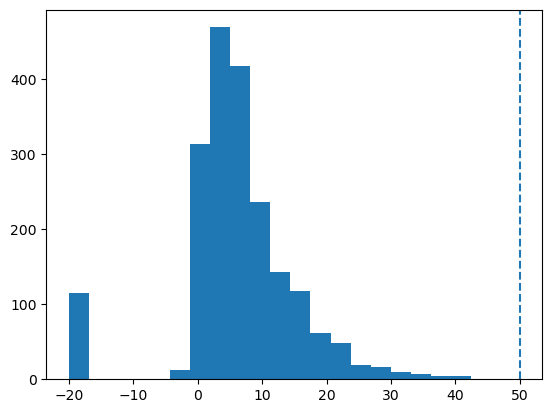

In [89]:
plt.hist(np.log2(np.hstack(coh_all[50,0.53]['observations'])+2**-20),bins=20)
# plt.yscale('log')
plt.axvline(x=50,ls='dashed')

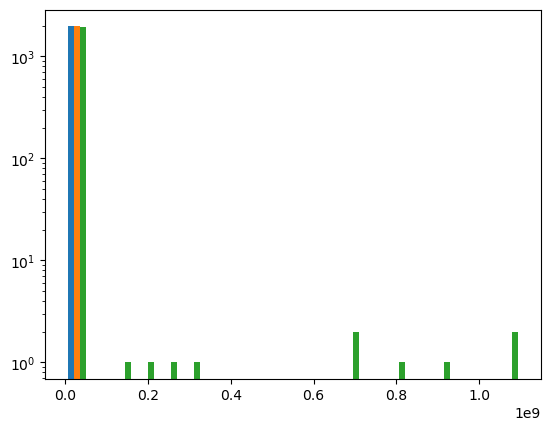

In [67]:
plt.hist(coh, bins=20)
plt.yscale('log')

In [33]:
np.log2(np.hstack(coh['observations']))

/tmp/ipykernel_624971/2489594112.py:1: RuntimeWarning: divide by zero encountered in log2
  np.log2(np.hstack(coh['observations']))
/tmp/ipykernel_624971/2489594112.py:1: RuntimeWarning: invalid value encountered in log2
  np.log2(np.hstack(coh['observations']))


array([29.43290548, 16.40496976, 35.72315067, ..., 44.0891843 ,
       30.00753622, 29.51418019])

In [39]:
np.isnan(np.log2(np.hstack(coh['observations']))).sum()

/tmp/ipykernel_624971/3036290823.py:1: RuntimeWarning: divide by zero encountered in log2
  np.isnan(np.log2(np.hstack(coh['observations']))).sum()
/tmp/ipykernel_624971/3036290823.py:1: RuntimeWarning: invalid value encountered in log2
  np.isnan(np.log2(np.hstack(coh['observations']))).sum()


2

In [48]:
(np.sort(np.hstack(coh['observations'])))[:10]

array([-2.54966611e-01, -6.66133815e-16,  0.00000000e+00,  0.00000000e+00,
        2.66453526e-15,  2.66453526e-15,  4.88498131e-15,  5.32907052e-15,
        5.32907052e-15,  6.21724894e-15])

In [ ]:
with open(f'coherence_MPS_err_log.pickle','wb') as f:
    pickle.dump([coh_mean,coh_meas_error,coh_fluc_error, abs_mps, abs_mps_error, total_est_error, est_error],f)

In [530]:
coh_mean

{(40, 0.45): 7799854675668768.0,
 (40, 0.47): 8558588922154.754,
 (40, 0.49): 5623750830.803825,
 (40, 0.5): 2591368861.228985,
 (40, 0.51): 1108819454.1940987,
 (40, 0.53): 73180642.4801112,
 (40, 0.55): 440538.31846592407,
 (40, 0.6): 375.7841842116754,
 (40, 0.65): 9.881737841690684,
 (40, 0.7): 2.972591420974641,
 (30, 0.45): 41041017.61745849,
 (30, 0.47): 25931445.14368558,
 (30, 0.49): 13043680.252693508,
 (30, 0.5): 7673921.752075662,
 (30, 0.51): 4365795.636063589,
 (30, 0.53): 906824.8497892696,
 (30, 0.55): 132534.2208105993,
 (30, 0.6): 952.7169548406481,
 (30, 0.65): 10.72254152075552,
 (30, 0.7): 2.9873211795637786,
 (20, 0.45): 83708.20753931966,
 (20, 0.47): 59703.002546854,
 (20, 0.49): 37239.07015858924,
 (20, 0.5): 24673.406088598076,
 (20, 0.51): 17963.433937293812,
 (20, 0.53): 7895.439412227561,
 (20, 0.55): 3020.90523406787,
 (20, 0.6): 109.45132588718948,
 (20, 0.65): 12.344107009602878,
 (20, 0.7): 3.1789052704010503,
 (10, 0.45): 190.88037952340872,
 (10, 0.47

In [420]:
coh_meas_error

{(40, 0.45): 27647195534999.832,
 (40, 0.47): 266325882989.74716,
 (40, 0.49): 4315713105.430905,
 (40, 0.5): 370081370.9583576,
 (40, 0.51): 160886145.75936192,
 (40, 0.53): 9584652.221416052,
 (40, 0.55): 417037.38479768985,
 (40, 0.6): 0.00032674337010980044,
 (40, 0.65): 2.668516004420717e-06,
 (40, 0.7): 5.649913655480522e-07,
 (30, 0.45): 10030999.96676761,
 (30, 0.47): 4056871.90715148,
 (30, 0.49): 1935877.1003823557,
 (30, 0.5): 216305.5026041443,
 (30, 0.51): 31720.807425540323,
 (30, 0.53): 7760.722609238925,
 (30, 0.55): 0.2049631277457603,
 (30, 0.6): 5.077625280683705e-07,
 (30, 0.65): 1.8474510589999556e-09,
 (30, 0.7): 1.4005214441685372e-09,
 (20, 0.45): 9635.119013369183,
 (20, 0.47): 5750.107087005484,
 (20, 0.49): 3289.178797542597,
 (20, 0.5): 1275.352248036478,
 (20, 0.51): 2092.284328429577,
 (20, 0.53): 999.4176768335384,
 (20, 0.55): 387.4932137998547,
 (20, 0.6): 43.02317039583636,
 (20, 0.65): 2.0053362126311844,
 (20, 0.7): 2.708223627110306e-13,
 (10, 0.45)

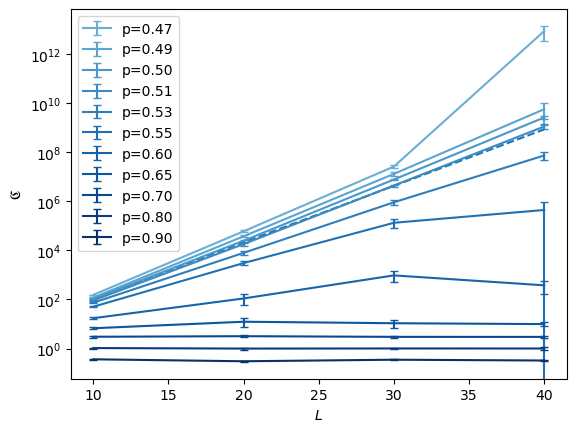

In [422]:
L_list_=[10,20,30,40]
p_list = [0.47,0.49,0.5,0.51,0.53,0.55,.6,0.65,.7,.8,.9]
# p_list = [0.5]
# 
# ,0.6,0.65,0.7,0.8,0.9,
color_list = plt.cm.Blues(np.linspace(.5,1,len(p_list)))
fig,ax=plt.subplots()
for idx,p in enumerate(p_list):
# for p in [0.5,0.51,0.53]:
# for p in [0.6,0.7,0.8,0.9]:
    # ax.errorbar(L_list_,y=[coh_mean[L,p]*2**L for L in L_list_ ],yerr=[((coh_fluc_error[L,p]**2+coh_meas_error[L,p]**2))**(1/2)*2**L for L in L_list_ ],label=f'p={p:.2f}',capsize=3,color=color_list[idx])
    ax.errorbar(L_list_,y=[coh_mean[L,p] for L in L_list_ ],yerr=[((coh_fluc_error[L,p]**2+coh_meas_error[L,p]**2))**(1/2) for L in L_list_ ],label=f'p={p:.2f}',capsize=3,color=color_list[idx])
    # ax.plot(L_list_s,coh_s,'.',color=color_list[idx])

ax.set_yscale('log')
ax.legend()
ax.set_xlabel('$L$')
ax.set_ylabel('$\mathfrak{C}$')

# ax.set_ylabel('$2^{-L}\mathfrak{C}$')
# ax.set_xscale('log')

# for idx,p in enumerate(p_list[:-1]):
#     ax.plot(L_list_, 2**(slope_list[idx][0]*np.array(L_list_) + slope_list[idx][1]),'--')
ax.plot(L_list_, 2**(slope_s[0]*np.array(L_list_) + slope_s[1]),'--',label='slope')

In [50]:
# p=0.50
slope_list = []
for p in p_list[:-1]:
    x_log = (L_list_)
    y_log = np.log2([coh_mean[L,p]*2**L for L in L_list_ ])
    slope_list.append(np.polyfit(x_log,y_log,1))
# (L_list_,,yerr=[((coh_fluc_error[L,p]**2+coh_meas_error[L,p]**2))**(1/2)*2**L for L in L_list_ ],label=f'p={p:.2f}',capsize=3)

In [47]:
x_s_log = L_list_s
y_s_log = np.log2(coh_s)
slope_s = np.polyfit(x_s_log,y_s_log,1)

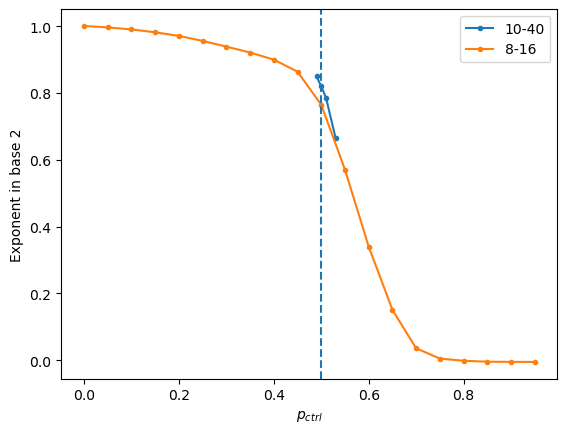

In [70]:
fig,ax=plt.subplots()
ax.plot( p_list[:-1], [slope[0] for slope in slope_list],'.-',label='10-40')
ax.plot(np.linspace(0,1,21)[:-1], slope_s[:,0],'.-',label='8-16')

ax.set_xlabel(r'$p_{{ctrl}}$')
ax.set_ylabel('Exponent in base 2')
ax.axvline(x=0.5,ls='--')
ax.legend()

In [40]:
coh_s= np.array([36.482573354034685, 106.97462049912662,   302.321460409866,
                860.6782858430988,  2575.185791066535])
L_list_s = [8,10,12,14,16]                

In [45]:
coh_s_1= np.array([20.554262038407614,  49.86262062475085, 106.37517253412322,
               223.76756209960476, 505.45272931894397])

In [61]:
slope_s=np.array([[ 1.00063597e+00, -3.57648012e-01],
       [ 9.96144074e-01, -3.93115952e-01],
       [ 9.90144748e-01, -4.32538628e-01],
       [ 9.81560769e-01, -4.67907378e-01],
       [ 9.70780731e-01, -5.11647049e-01],
       [ 9.55823010e-01, -5.46182042e-01],
       [ 9.38703175e-01, -5.99826718e-01],
       [ 9.21038170e-01, -7.09153708e-01],
       [ 8.99807553e-01, -8.75700528e-01],
       [ 8.63541640e-01, -1.06476084e+00],
       [ 7.64542797e-01, -9.24515367e-01],
       [ 5.70305185e-01, -1.39350293e-01],
       [ 3.39721640e-01,  8.26362521e-01],
       [ 1.50528310e-01,  1.35600503e+00],
       [ 3.55933119e-02,  1.33289688e+00],
       [ 4.81674473e-03,  7.27481093e-01],
       [-1.66316561e-03,  6.49994513e-02],
       [-4.53303729e-03, -5.74773917e-01],
       [-4.93876865e-03, -1.34434560e+00],
       [-5.13727494e-03, -2.48648725e+00]])

In [103]:
L_list_

array([10, 20, 30, 40])

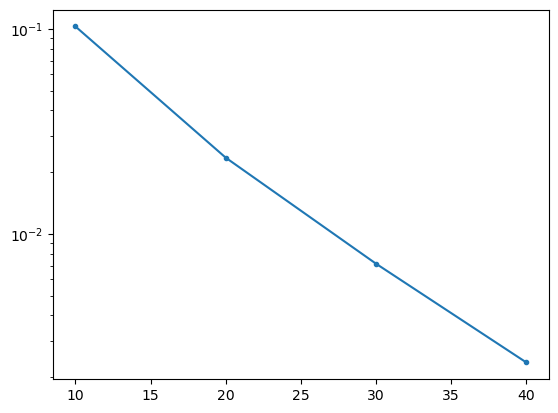

In [25]:
p=0.5
plt.plot(L_list_+[],[coh_mean[L,p] for L in L_list_+[]],'.-')
plt.yscale('log')
# plt.xscale('log')

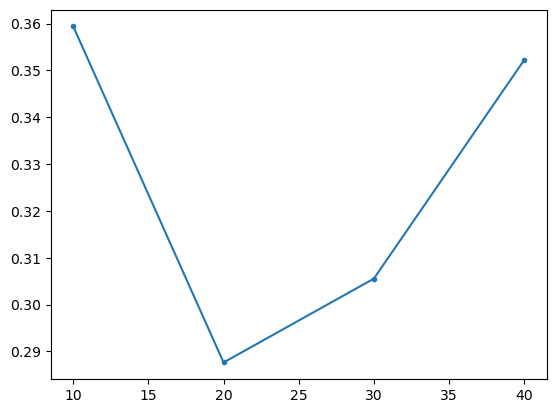

In [98]:
p=0.5
plt.plot(L_list_,[coh_mean[L,p]*2**L / 2**(slope_list[0][0]*L) for L in L_list_],'.-')

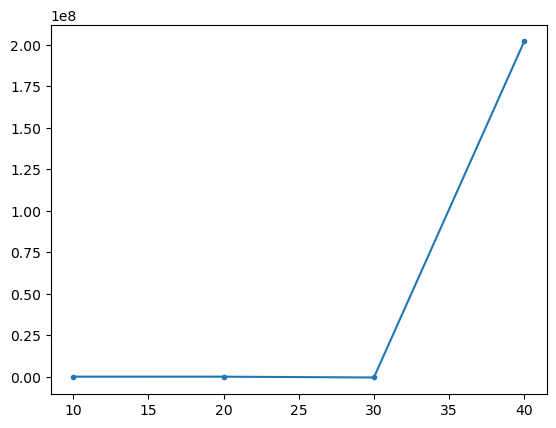

In [97]:
p =0.5
plt.plot(L_list_,[coh_mean[L,p]*2**L - 2**(slope_list[0][0]*L + slope_list[0][1]) for L in L_list_],'.-')

In [27]:
with open('circ_var_C_m_T_O_L30.pickle','rb') as f:
    zz=pickle.load(f)

In [32]:
zz[0][0.5,30]

array([9.56493848e-31, 5.66150399e-04, 1.09830144e-03, ...,
       1.56367094e-01, 1.62881176e-01, 1.64897429e-01])

In [35]:
with open('circ_var_C_m_T_O_L30.pickle','rb') as f:
    zz1=pickle.load(f)

In [39]:
zz1[1][0.5,30] - zz[1][0.5,30]

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
coh_mean

{(30, 30, 0.5): 0.007432044446317521,
 (30, 60, 0.5): 0.00742065125454608,
 (30, 120, 0.5): 0.007417994081086397}

In [38]:
coh_mean

{(30, 30, 0.5): 0.00713912563860121,
 (30, 60, 0.5): 0.00712791840567439,
 (30, 120, 0.5): 0.0071273034277648094}

In [42]:
coh_meas_error

{(30, 30, 0.5): 0.020918091935781345,
 (30, 60, 0.5): 0.007914249124768775,
 (30, 120, 0.5): 0.0032978930683009396,
 (30, 400, 0.5): 0.0007860926833925711,
 (30, 1200, 0.5): 0.00024006629674969894,
 (30, 4000, 0.5): 2.7157570409773995e-05}

In [270]:
# L=30
# maxbond=30
t=2
coh_mean = {}
coh_meas_error = {}
coh_fluc_error = {}
abs_mps = {}
abs_mps_error={}
total_est_error={}
est_error={}
for maxbond in params_list[0][1]['maxbond']:
    # for t in params_list[0][1]['t']:
    for p in params_list[0][1]['p_ctrl']:
        coh= df_MPS_0_T.xs('coh_mat',level='Metrics').xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj').xs(maxbond,level='maxbond')
        abs_mps[L,maxbond,p]=(df_MPS_0_T.xs('coh_mat',level='Metrics').xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj').xs(maxbond,level='maxbond')+1).applymap(np.sqrt)
        abs_mps_error[L,maxbond,p]=df_MPS_0_T.xs('errors',level='Metrics').xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj').xs(maxbond,level='maxbond')
        est_error[L,maxbond,p] =  2 * abs_mps[L,maxbond,p] * abs_mps_error[L,maxbond,p]
        total_est_error[L,maxbond,p] = np.sqrt(np.sum(est_error[L,maxbond,p]**2)[0])/(est_error[L,maxbond,p].shape[0])
        coh_meas_error[L,maxbond,p]=total_est_error[L,maxbond,p]
        coh_mean[L,maxbond,p]=coh['observations'].mean()/2**L
        coh_fluc_error[L,maxbond,p]=coh['observations'].std()/np.sqrt(coh.shape[0])/2**L

with open(f'coherence_MPS_err_L{L}.pickle','wb') as f:
    pickle.dump([coh_mean,coh_meas_error,coh_fluc_error, abs_mps, abs_mps_error, total_est_error, est_error],f)


In [22]:
(abs_mps_error[L,1200,0.5] < abs_mps[L,1200,0.5]/2**L * 2).sum()

observations    2000
dtype: int64

In [23]:
(ranks[L,1200,0.5]<1200).sum()

observations    1565
dtype: int64

In [ ]:
abs_mps_error 

In [ ]:
abs_mps/2**L * 2

In [24]:
coh_mean

{(30, 30, 0.5): 0.007158245904254549,
 (30, 60, 0.5): 0.007152948710012261,
 (30, 120, 0.5): 0.007150469993062872,
 (30, 400, 0.5): 0.0071484930481673405,
 (30, 1200, 0.5): 0.007147620117906116,
 (30, 4000, 0.5): 0.006758855075025941}

In [ ]:
now you need to check in each trajectory, how much does it improve though

In [44]:
coh_fluc_error

{(30, 120, 0.5): 0.000517671952195174,
 (30, 120, 0.51): 0.00038128760746014947,
 (30, 120, 0.53): 0.00018110936976656786,
 (30, 120, 0.55): 4.804729919709875e-05,
 (30, 120, 0.6): 4.1322235734095693e-07,
 (30, 400, 0.5): 0.0005174906929884638,
 (30, 400, 0.51): 0.0003809162865041478,
 (30, 400, 0.53): 0.00018086934784824717,
 (30, 400, 0.55): 4.804663807289915e-05,
 (30, 400, 0.6): 4.132343623449591e-07,
 (30, 1200, 0.5): 0.000517353566920101,
 (30, 1200, 0.51): 0.00038092529265175597,
 (30, 1200, 0.53): 0.00018089209024639834,
 (30, 1200, 0.55): 4.804663025605642e-05,
 (30, 1200, 0.6): 4.132343608028702e-07,
 (30, 4000, 0.5): 0.0004167265553459395,
 (30, 4000, 0.51): 0.0002385011221237911,
 (30, 4000, 0.53): 7.183834945160201e-05,
 (30, 4000, 0.55): 6.399913876842443e-05,
 (30, 4000, 0.6): 4.5618874122780194e-07}

In [20]:
coh_meas_error

{(30, 400, 0.5): 0.0007860926833925711,
 (30, 400, 0.51): 0.00035267139499618044,
 (30, 400, 0.53): 0.000289443482831944,
 (30, 400, 0.55): 1.1422996989406891e-05,
 (30, 400, 0.6): 2.2022256876463182e-08,
 (30, 1200, 0.5): 0.00024006629674969894,
 (30, 1200, 0.51): 9.741383553667676e-05,
 (30, 1200, 0.53): 7.521964820788454e-05,
 (30, 1200, 0.55): 3.2889090220593803e-07,
 (30, 1200, 0.6): 4.593040522403033e-16,
 (30, 4000, 0.5): 2.322027587465498e-05,
 (30, 4000, 0.51): 2.9147893647432246e-05,
 (30, 4000, 0.53): 2.7857747274834556e-08,
 (30, 4000, 0.55): 3.9675759022472865e-12,
 (30, 4000, 0.6): 5.891836985856e-16}

In [ ]:
est_error

In [23]:
np.sqrt(np.sum(est_error**2)['observations'])/est_error.shape[0]

0.0027440789954399796

In [14]:
est_error

,observations
seed,
0,0.0
1,0.0
2,0.027008
3,0.004318
4,0.0
...,...
1995,0.555328
1996,0.002514
1997,1.343307


In [15]:
abs_mps

,observations
seed,
0,3.352193
1,2.502820
2,3865.301259
3,2789.257499
4,6.614736
...,...
1995,7862.857792
1996,2988.032539
1997,13784.074421


In [16]:
abs_mps_error

,observations
seed,
0,2.9604753682622612e-18
1,9.193864285191776e-33
2,3.4936899780956783e-06
3,7.73984666434102e-07
4,6.30863529206215e-18
...,...
1995,3.531334476513497e-05
1996,4.20749462149356e-07
1997,4.872679270085565e-05


In [258]:
coh.mean()/2**L

observations    0.023951
dtype: float64

(array([795.,  96.,  58.,  51.,  28.,  35.,  24.,  17.,  16.,  16.,  13.,
         11.,  10.,   9.,   5.,   3.,   7.,   6.,   8.]),
 array([0.        , 0.00026316, 0.00052632, 0.00078947, 0.00105263,
        0.00131579, 0.00157895, 0.00184211, 0.00210526, 0.00236842,
        0.00263158, 0.00289474, 0.00315789, 0.00342105, 0.00368421,
        0.00394737, 0.00421053, 0.00447368, 0.00473684, 0.005     ]),
 <BarContainer object of 19 artists>)

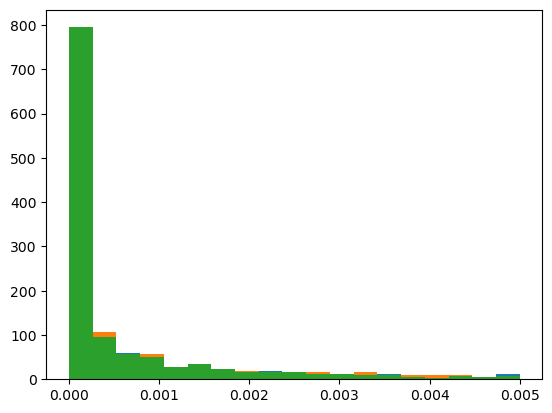

In [277]:
plt.hist(df_MPS_0_T.xs('coh_mat',level='Metrics').xs(2,level='t').xs(0.5,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj').xs(120,level='maxbond')['observations']/2**20,bins=np.linspace(0,0.005,20))
plt.hist(df_MPS_0_T.xs('coh_mat',level='Metrics').xs(4,level='t').xs(0.5,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj').xs(120,level='maxbond')['observations']/2**20,bins=np.linspace(0,0.005,20))
plt.hist(df_MPS_0_T.xs('coh_mat',level='Metrics').xs(6,level='t').xs(0.5,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj').xs(120,level='maxbond')['observations']/2**20,bins=np.linspace(0,0.005,20))

In [199]:
df_MPS_0_T.xs('coh_mat',level='Metrics').xs(2,level='t')

observations
p_ctrl L  p_proj maxbond seed                    
0.5    10 0.0    30      0     2.0481510814759507
                 60      0     2.0481510814759507
                 120     0     2.0481510814759507
                 30      1      46.05620062704553
                 60      1      46.05620062704553
...                                           ...
                         1998   5.826881193637752
                 120     1998   5.826881193637752
                 30      1999   2.215692052769012
                 60      1999   2.215692052769012
                 120     1999   2.215692052769012

[6000 rows x 1 columns]

In [200]:
coh_MPS={}
coh_sem={}
coh_total={}
for p_ctrl in params_list[0][1]['p_ctrl']:
    for maxbond in params_list[0][1]['maxbond']:
        for t in params_list[0][1]['t']:
            try:
                data=df_MPS_0_T.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj').xs(maxbond,level='maxbond').xs(t,level='t')['observations']
                coh_MPS[L,p_ctrl,maxbond,t]=data.mean()/2.**L
                coh_sem[L,p_ctrl,maxbond,t]=data.sem()/2.**L
                coh_total[L,p_ctrl,maxbond,t]=np.hstack(data)/2.**L
                # /2.**L
            except:
                pass
# with open(f'coherence_MPS_L{L}.pickle','wb') as f:
#     pickle.dump([coh_MPS,coh_sem,coh_total],f)

In [201]:
coh_MPS

{(10, 0.5, 30, 2): 0.10278849445975696,
 (10, 0.5, 30, 4): 0.10003175615201132,
 (10, 0.5, 30, 6): 0.10072339165615632,
 (10, 0.5, 60, 2): 0.10278824569199052,
 (10, 0.5, 60, 4): 0.10003294720229804,
 (10, 0.5, 60, 6): 0.1007219213957429,
 (10, 0.5, 120, 2): 0.10278810211953048,
 (10, 0.5, 120, 4): 0.10003057889191123,
 (10, 0.5, 120, 6): 0.10072313721699865}

In [202]:
coh_MPS[80,0.5,60]-coh_MPS[80,0.5,30]

KeyError: (80, 0.5, 60)

In [ ]:
coh_MPS

{(40, 0.5, 30): 0.0023648805487975068,
 (40, 0.5, 60): 0.0023594302956547555,
 (40, 0.5, 120): 0.0023586484909077646,
 (40, 0.5, 200): 0.0023585400080597682,
 (40, 0.5, 400): 0.002358455328108034}

In [ ]:
coh_MPS

{(40, 0.5, 30): 0.002312100406099989,
 (40, 0.5, 60): 0.0023072268072126694,
 (40, 0.5, 120): 0.0023064463177711113,
 (40, 0.5, 200): 0.0023063394477186357,
 (40, 0.5, 400): 0.0023062700188255444}

In [ ]:
coh_MPS

{(30, 0.5, 30): 0.007161151508302893,
 (30, 0.5, 60): 0.007154417852309513,
 (30, 0.5, 120): 0.0071511694730023775,
 (30, 0.5, 200): 0.007145276798369299,
 (30, 0.5, 400): 0.007131255385924553}

(array([8741.83976261,  296.73590504,  178.04154303,  100.89020772,
          77.15133531,   94.95548961,  118.69436202,   53.41246291,
          29.6735905 ,   41.54302671,   41.54302671,   29.6735905 ,
          47.47774481,   29.6735905 ,   29.6735905 ,   11.8694362 ,
          17.8041543 ,   11.8694362 ,   35.60830861,   11.8694362 ]),
 array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
        0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
        0.0016, 0.0017, 0.0018, 0.0019, 0.002 ]),
 <BarContainer object of 20 artists>)

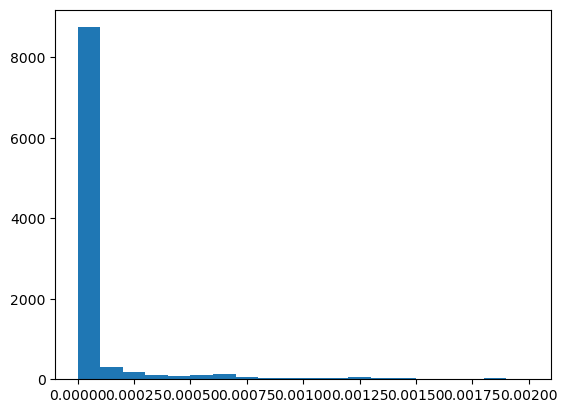

In [ ]:
plt.hist(coh_total[40,0.5,30],bins=np.linspace(0,.002,21),density=True)

In [ ]:
coh_total[40,0.5,30].argsort()[-1]

258

In [ ]:
[coh_total[40,0.5,x][258] for x in [30,60,120,200,400]]

[0.0984748705193905,
 0.09842677254873895,
 0.09809109227094641,
 0.09793648973012718,
 0.09808598991088313]

In [ ]:
[coh_total[30,0.5,x][784] for x in [30,60,120,200,400]]

[222021385.53951824,
 224541570.27192634,
 224177020.7557927,
 224079869.38459286,
 224043193.29424337]

In [ ]:
[coh_total[30,0.5,x][647] for x in [30,60,120,200,400]]

[0.1904592835026073,
 0.19033735708781566,
 0.19034541619816192,
 0.19035528918479644,
 0.19035396812725563]

In [ ]:
[coh_total[30,0.5,x][886] for x in [30,60,120,200,400]]

[0.1837571583082736,
 0.1828845403746454,
 0.18251517694742478,
 0.18242169197219782,
 0.18247712512303774]

In [ ]:
[coh_total[30,0.5,x][1172] for x in [30,60,120,200,400]]

[0.1716721436018411,
 0.16938584664074066,
 0.1696145595553328,
 0.16959050558457447,
 0.16962467948182966]

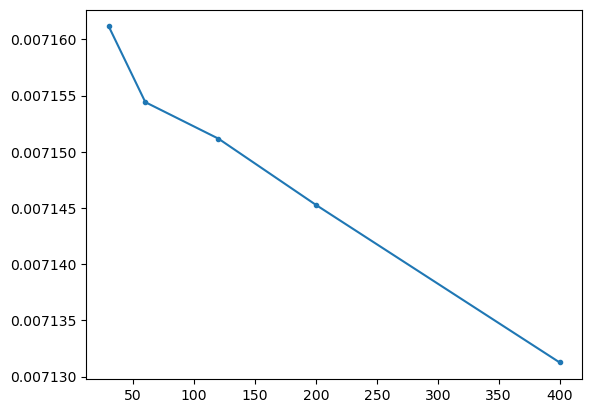

In [ ]:
plt.plot([30,60,120,200,400],[coh_MPS[30,0.5,chi] for chi in [30,60,120,200,400]],'.-')

In [ ]:
coh_total[30,0.5,30]

array([1.65268330e-02, 4.81876629e-02, 1.07209699e-08, ...,
       4.57365707e-04, 1.26516007e-01, 1.11157837e-03])

In [ ]:
coh_total[30,0.5,60]

array([1.64178351e-02, 4.80802492e-02, 1.07209699e-08, ...,
       4.57369011e-04, 1.26243262e-01, 1.11215078e-03])

In [ ]:
two things to check here:
L=40 , mb =30, to see whether it converge => it converges
L=30 with larger system size to see whether it increase => not really
L=50, 60 : with mb=60 to see if converge => 

In [ ]:
df_MPS_0_T.xs('coh_mat',level='Metrics').xs(L,level='L').xs(0.6,level='p_ctrl').xs(0.0,level='p_proj').xs(30,level='maxbond')['observations'].apply(np.sum).mean()/2**L

0.016764622921920942

In [ ]:
df_MPS_0_T.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj').xs(60,level='maxbond')['observations'].apply(np.sum).mean()/2**L

0.00030641924994547615

(array([1474.,   36.,   16.,    6.,    6.,    8.,    6.,    4.,    3.]),
 array([0.        , 0.00222222, 0.00444444, 0.00666667, 0.00888889,
        0.01111111, 0.01333333, 0.01555556, 0.01777778, 0.02      ]),
 <BarContainer object of 9 artists>)

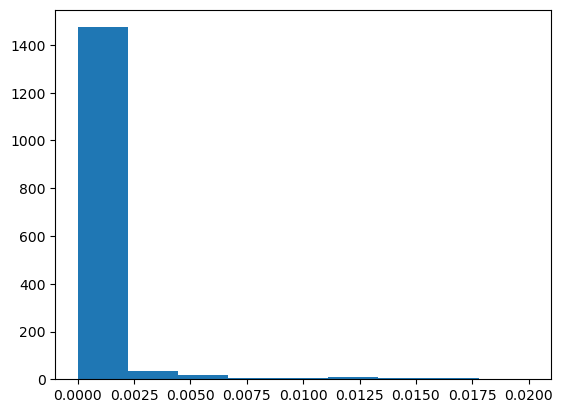

In [ ]:
plt.hist(df_MPS_0_T_60.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj')['observations'].apply(np.sum)/2**L,bins=np.linspace(0,0.02,10))

In [ ]:
df_MPS_0_T_60.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj')['observations'].apply(np.sum)

seed
2       1.151410e+01
5       8.958706e+00
7       9.526275e+04
8       2.414734e+04
9       8.127373e+00
            ...     
1994    9.422158e+05
1995    1.901574e+06
1997    4.910962e+05
1998    1.355376e+08
1999    1.194162e+06
Name: observations, Length: 1589, dtype: float64

In [ ]:
df_MPS_0_T.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj').xs(60,level='maxbond')['observations'].apply(np.sum).mean()/2**L

0.007165892643777692

In [ ]:
df_MPS_0_T.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj')['observations'].apply(np.sum)

seed
0       1.766967e+07
1       5.180492e+07
2       1.158132e+01
3       1.078619e+08
4       3.981824e+05
            ...     
1993    4.649178e+00
1994    9.422852e+05
1995    1.901489e+06
1996    3.722598e+07
1997    4.911054e+05
Name: observations, Length: 1967, dtype: float64

In [ ]:
old_idx=df_MPS_0_T.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj')['observations'].index

In [ ]:
new_idx=df_MPS_0_T_60.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj')['observations'].index

In [ ]:
old_data=df_MPS_0_T.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj')['observations']
new_data=df_MPS_0_T_60.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj')['observations']

In [ ]:
(new_data.apply(np.sum)/2**L).sem()

0.00023799835266458

In [ ]:
(new_data.apply(np.sum)/2**L).mean()

0.0015580612501484702

In [ ]:
(old_data.apply(np.sum)/2**L).mean()

0.007104088316699208

In [ ]:
(old_data.apply(np.sum)/2**L).sem()

0.0005228982526062203

In [ ]:
common_idx = set(old_idx) & set(new_idx)

In [ ]:
failded_idx=(set(old_idx) - set(new_idx))

In [ ]:
len(common_idx)

1565

In [ ]:
len(failded_idx)

402

In [ ]:
old_data.apply(np.sum).

seed
0       1.766967e+07
1       5.180492e+07
2       1.158132e+01
3       1.078619e+08
4       3.981824e+05
            ...     
1993    4.649178e+00
1994    9.422852e+05
1995    1.901489e+06
1996    3.722598e+07
1997    4.911054e+05
Name: observations, Length: 1967, dtype: float64

In [ ]:
diff_data=(new_data[list(common_idx)].apply(np.sum) - old_data[list(common_idx)].apply(np.sum))

In [ ]:
diff_data

seed
2         -0.067223
5          0.000000
7          0.871116
8          2.766995
9          0.000000
           ...     
1992   -6669.889322
1993       0.000000
1994     -69.448821
1995      84.560753
1997      -9.165162
Name: observations, Length: 1565, dtype: float64

In [ ]:
new_data[list(common_idx)].apply(np.sum).min()

2.5035740442364275e-16

In [ ]:
diff_data[(diff_data>0)].mean()

1426.6408687085668

In [ ]:
diff_data[(diff_data<0)].mean()

-1259.3708198524341

In [ ]:
(diff_data==0).sum()

443

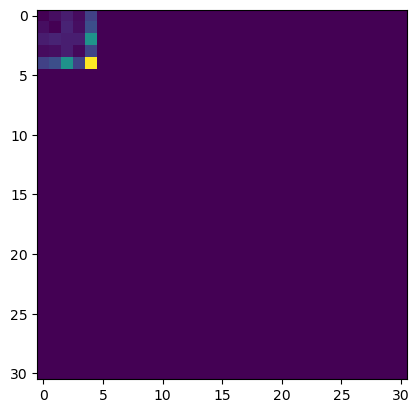

In [ ]:
plt.imshow(new_data[5])

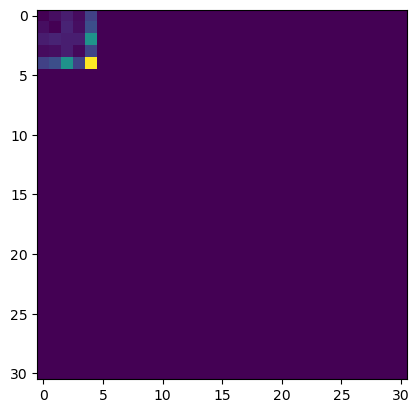

In [ ]:
plt.imshow(old_data[5])

In [ ]:
(old_data[failded_idx].apply(np.sum)).mean()/2**L

/tmp/ipykernel_2726469/2392717559.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  (old_data[failded_idx].apply(np.sum)).mean()/2**L


0.029026386897097033

In [ ]:
(new_data[common_idx].apply(np.sum)).mean()/2**L

/tmp/ipykernel_2726469/1450306642.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  (new_data[common_idx].apply(np.sum)).mean()/2**L


0.001472916302787556

(array([1574.,   72.,   44.,   15.,   19.,   22.,   15.,   18.,   11.]),
 array([0.        , 0.00222222, 0.00444444, 0.00666667, 0.00888889,
        0.01111111, 0.01333333, 0.01555556, 0.01777778, 0.02      ]),
 <BarContainer object of 9 artists>)

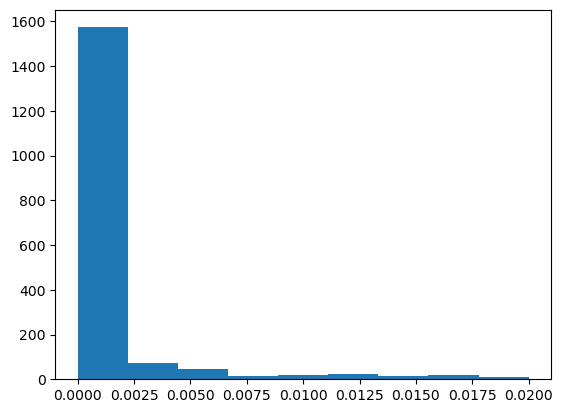

In [ ]:
plt.hist(df_MPS_0_T.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj')['observations'].apply(np.sum)/2**L,bins=np.linspace(0,0.02,10))

In [ ]:
# L=20
p_ctrl_list=[0.5]
# p_ctrl_list=[0.4,0.45,0.47,0.49,0.5,0.51,0.53,0.55,0.6]
coh={}
coh_sem={}
for p_ctrl in p_ctrl_list:
    coh[L,p_ctrl]=(df_MPS_0_T.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj')['observations'].apply(np.sum)/2**L).mean()
    coh_sem[L,p_ctrl]=(df_MPS_0_T.xs('coh_mat',level='Metrics').xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(0.0,level='p_proj')['observations'].apply(np.sum)/2**L).sem()

<ErrorbarContainer object of 3 artists>

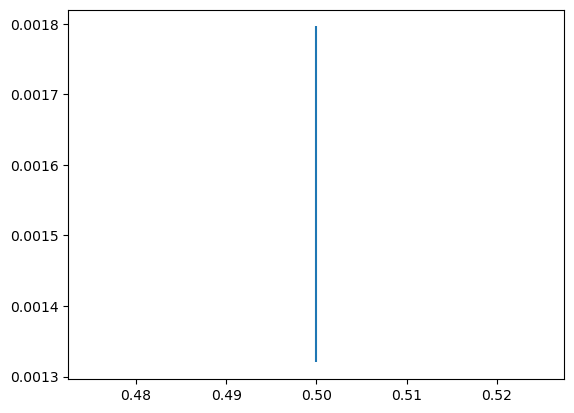

In [ ]:
plt.errorbar(p_ctrl_list,[coh[L,p_ctrl] for p_ctrl in p_ctrl_list],yerr=[coh_sem[L,p_ctrl] for p_ctrl in p_ctrl_list])

In [ ]:
coh

{(30, 0.5): 0.0015580612501484702}

In [ ]:
with open(f'coherence_L{L}.pickle','wb') as f:
    pickle.dump([coh,coh_sem],f)

In [ ]:
fns=set(os.listdir('./MPS_0-1_coherence/'))

In [ ]:
len(data_MPS_0_T_dict['fn'])

4808

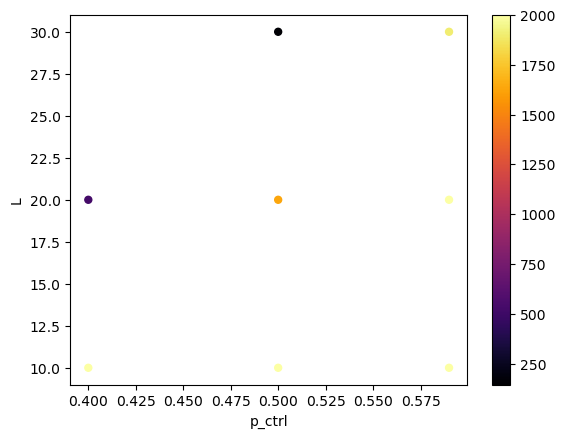

In [ ]:
visualize_dataset(df_MPS_0_T,params={'Metrics':'coh_mat','T':0,'p_proj':0},xlabel='p_ctrl',ylabel='L')

In [ ]:
p_ctrl=0.4
L=10
intra_=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.diag).tolist())
inter_=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(lambda x:x[0]).tolist())
fdw_=np.stack(df_MPS_0_T.xs(level='Metrics',key='fdw').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).tolist())

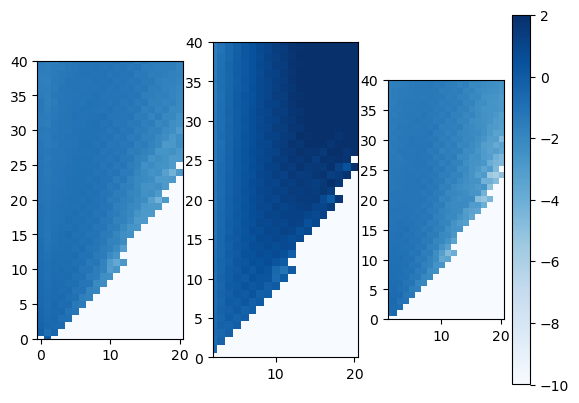

In [ ]:
fig,ax=plt.subplots(1,3)
ax[0].imshow(np.log10(fdw_+1e-10),cmap='Blues',vmin=-10,vmax=2)
ax[1].imshow(np.log10(intra_+1e-10),cmap='Blues',vmin=-10,vmax=2)
im=ax[2].imshow(np.log10(inter_+1e-10),cmap='Blues',vmin=-10,vmax=2)

[ax.set_ylim(0,40) for ax in ax]
ax[1].set_xlim(2,None)
ax[2].set_xlim(1,None)

plt.colorbar(im)

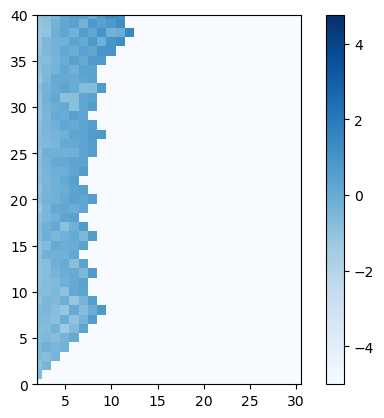

In [ ]:
plt.imshow(np.log10(intra_+1e-5),cmap='Blues')
plt.ylim(0,40)
plt.xlim(2,None)
plt.colorbar()

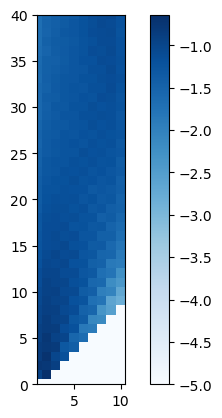

In [ ]:
plt.imshow(np.log10(inter_+1e-5),cmap='Blues')
plt.ylim(0,40)
plt.xlim(1,None)
plt.colorbar()

In [ ]:
intra_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=30)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.trace).tolist())

In [ ]:
total_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=30)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.sum).tolist())

In [ ]:
total_sum

array([-1.00000000e+00,  2.91356427e+07,  1.13505246e+08, ...,
        5.81511678e+06,  6.34485467e+06,  5.72471530e+06])

In [ ]:
data_list=[]
for L in [10,20]:
    print(L)
    intra_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.trace).tolist())
    total_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.sum).tolist())
    data_list.append((total_sum-intra_sum))
    # data_list.append((total_sum-intra_sum)/total_sum)

10
20


In [ ]:
intra_sum[-10:]

array([7961.52950012, 7705.48183543, 7688.59755396, 7527.91266765,
       7690.46731413, 7863.73205012, 7657.34232902, 8104.40830362,
       8200.45355945, 8599.75844877])

In [ ]:
total_sum[-10:]

array([21959.9679025 , 21273.70358014, 21165.39002693, 20722.72193389,
       21214.94372481, 21211.78699366, 20768.28389788, 22124.86452058,
       22399.32335391, 23460.12430596])

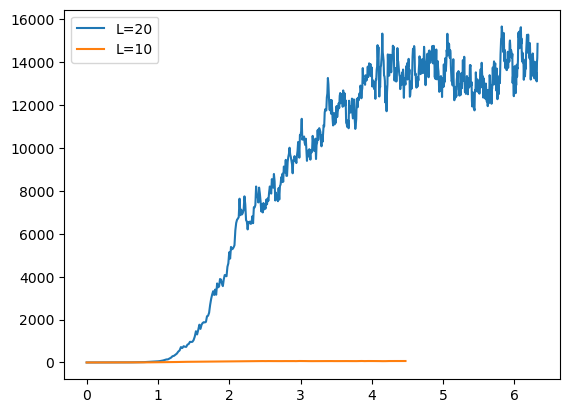

In [ ]:
fig,ax=plt.subplots()
z=1
for L,data in zip([20,10],data_list[::-1]):
    # intra_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(lambda x: contract(x,[0,0])).tolist())
    # total_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.sum).tolist())
    # data = (total_sum-intra_sum)/total_sum
    t_list= np.arange(2*L**2+1)
    
    ax.plot(np.sqrt(t_list/L**z),data,label='L={}'.format(L))
ax.legend()
# ax.set_xlim(0,40)

NameError: name 'data_list' is not defined

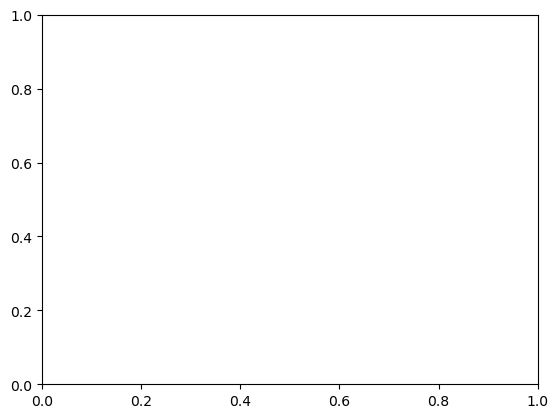

In [ ]:
fig,ax=plt.subplots()
z=1
for L,data in zip([30,20,10],data_list[::-1]):
    intra_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(lambda x: contract(x,[0,0])).tolist())
    total_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.sum).tolist())
    data = (total_sum-intra_sum)/total_sum
    t_list= np.arange(2*L**2+1)
    
    ax.plot(np.sqrt(t_list/L**z),data,label='L={}'.format(L))
ax.legend()
# ax.set_xlim(0,40)

# Draft 

In [ ]:
approx=df_MPS_0_T.xs(0.47,level='p_ctrl').xs('coh_mat',level='Metrics').xs(1200,level='maxbond')['observations']

In [ ]:
approx_4000=df_MPS_0_T.xs(0.47,level='p_ctrl').xs('coh_mat',level='Metrics').xs(4000,level='maxbond')['observations']

In [ ]:
np.log10(9138425505475408.0)

15.960871375910285

In [ ]:
df_MPS_0_T.xs(0.47,level='p_ctrl').xs(656,level='seed')['observations']

Metrics  t    L   p_proj  maxbond
coh_mat  2.0  40  0.0     1200         9138425505475408.0
ranks    2.0  40  0.0     1200                       1220
errors   2.0  40  0.0     1200       9.68699447833017e-07
Name: observations, dtype: object

In [ ]:
(approx_4000 + approx).sort_values().dropna()

t    L   p_proj  seed
2.0  40  0.0     750                    0.0
                 676                    0.0
                 461                    0.0
                 745                    0.0
                 561                    0.0
                                ...        
                 257     26459752113.204765
                 138     32151823751.701378
                 576     57270979652.397408
                 6        63632278582.96785
                 38      85057658749.024414
Name: observations, Length: 556, dtype: object

In [ ]:
approx_rank=df_MPS_0_T.xs(0.5,level='p_ctrl').xs('ranks',level='Metrics').xs(1200,level='maxbond')['observations']

In [ ]:
approx_err=df_MPS_0_T.xs(0.5,level='p_ctrl').xs('errors',level='Metrics').xs(1200,level='maxbond')['observations']

In [ ]:
(approx_rank>=1220).sum()

408

In [ ]:
approx_rank, approx, approx_err

In [ ]:
df_MPS_0_T.xs(0.5,level='p_ctrl').xs(1200,level='maxbond').xs(32,level='seed')['observations']

Metrics  t    L   p_proj
coh_mat  2.0  40  0.0         14736202.101611458
ranks    2.0  40  0.0                       1201
errors   2.0  40  0.0       7.95050085236933e-14
Name: observations, dtype: object

In [ ]:
df_MPS_0_T.xs(0.47,level='p_ctrl').xs(1200,level='maxbond').xs(65,level='seed')['observations']

Metrics  t    L   p_proj
coh_mat  2.0  40  0.0          26873367.955452707
ranks    2.0  40  0.0                        1167
errors   2.0  40  0.0       8.885823489110874e-17
Name: observations, dtype: object

In [ ]:
np.log10(np.mean((np.vstack(approx).flatten())))

15.914556802296845

In [ ]:
np.log10(np.pi/4*(2**40-1))

11.936289707925024

In [ ]:
(approx)

t    L   p_proj  seed
2.0  40  0.0     0       3900.3254937328306
                 1       213.42980847548324
                 2        760473549.4957591
                 3       1104808.5030269402
                 4        6003125.813362147
                                ...        
                 1995    32138654365.499634
                 1996    16119206.591923043
                 1997      383193217.595922
                 1998     780.4100452408494
                 1999     1.431642128257594
Name: observations, Length: 2000, dtype: object

In [ ]:
np.log10(9138425505475408.0)

15.960871375910285

In [ ]:
(approx.sort_values()[::-1])[:20]

t    L   p_proj  seed
2.0  40  0.0     656     9138425505475408.0
                 32      4397419776328138.5
                 1980    2583579033328542.5
                 1525    160042891996789.66
                 341     154810427641939.28
                 527     116117435090734.83
                 547      92213365506046.92
                 1650     74396951568153.48
                 916      73191438349813.03
                 217      22795131491081.93
                 712     13262549744534.312
                 485     12756541029171.445
                 1933     8710914240042.575
                 960      6691462368616.709
                 1105     5486573612896.012
                 1139     3990958615264.644
                 1350     1304232757599.495
                 1351     1274646908481.872
                 1930     1188720773394.444
                 565     1056466839309.0255
Name: observations, dtype: object

array([7.10542736e-15, 7.99360578e-15, 4.54536382e-01, ...,
       2.58357903e+15, 4.39741978e+15, 9.13842551e+15])

In [ ]:
np.zeros(approx.shape[0]),np.log10(np.hstack(approx.sort_values()))

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([-14.1484098 , -14.09725727,  -0.34243135, ...,  15.41222175,
         15.64319793,  15.96087138]))

In [ ]:
approx=df_MPS_0_T.xs(0.70,level='p_ctrl').xs('coh_mat',level='Metrics').xs(4000,level='maxbond')['observations']

/tmp/ipykernel_1814859/537795726.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(np.hstack(approx.sort_values())),np.zeros(approx.shape[0]))
/tmp/ipykernel_1814859/537795726.py:1: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(np.hstack(approx.sort_values())),np.zeros(approx.shape[0]))


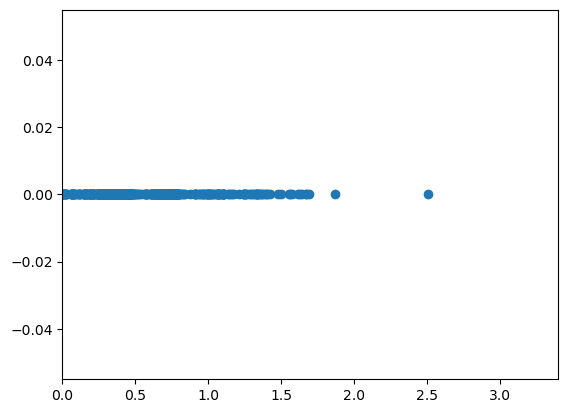

In [ ]:
plt.scatter(np.log10(np.hstack(approx.sort_values())),np.zeros(approx.shape[0]))
plt.xlim(0,None)
plt.axvline(x=np.log10(np.pi/4*(2**L-1)),color='r')

In [ ]:
107791632279.2782

107791632279.2782

(array([   2.,    0.,    0.,    0.,    3.,   68.,  248., 1051.,  588.,
          12.]),
 array([-14.1484098 , -11.13748168,  -8.12655356,  -5.11562544,
         -2.10469733,   0.90623079,   3.91715891,   6.92808702,
          9.93901514,  12.94994326,  15.96087138]),
 <BarContainer object of 10 artists>)

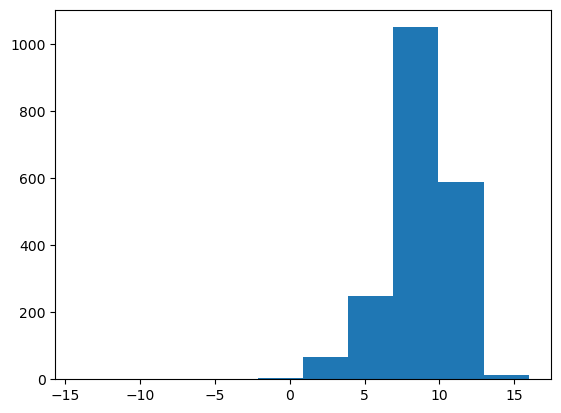

In [ ]:
(plt.hist(np.log10(np.vstack(approx).flatten())))

In [ ]:
exact=df_MPS_0_T_ed.xs(0.5,level='p_ctrl').xs('coh_mat',level='Metrics').xs(-1,level='maxbond')

In [ ]:
(approx)-exact

observations
t   L  p_proj seed             
2.0 30 0.0    0       -1.496993
              1         0.74592
              2             0.0
              3      -56.458942
              4             0.0
...                         ...
              1995          NaN
              1996     0.001169
              1997          0.0
              1998         -0.0
              1999          0.0

[2000 rows x 1 columns]

In [ ]:
maxbond=4000
p=0.5
abs_mps_=(df_MPS_0_T.xs('coh_mat',level='Metrics').xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj').xs(maxbond,level='maxbond')+1).applymap(np.sqrt)
abs_mps_error_=df_MPS_0_T.xs('errors',level='Metrics').xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj').xs(maxbond,level='maxbond')
est_error_ =  2 * abs_mps_ * abs_mps_error_ * 2**L

In [ ]:
(est_error_)

,observations
seed,
0,330051.098346
1,17348.366817
2,0.0
3,382105.108169
4,0.000162
...,...
1991,0.000001
1996,18.737614
1997,0.00041


In [ ]:
(df_MPS_0_T.xs(level='Metrics',key='coh_mat')['observations']).values.argsort()[::-1][:20]

array([1848,  630, 1762, 2504, 2963, 1134,  255,   17, 1305, 1223, 1783,
       2511, 3253, 1463,  721, 2216,  595,  525, 2763, 1973])

In [ ]:
(df_MPS_0_T.xs(level='Metrics',key='coh_mat')['observations']).index[1848]

(2.0, 0.5, 50, 0.0, 4000, 639)

In [ ]:
(df_MPS_0_T.xs(level='Metrics',key='coh_mat')['observations']).iloc[1848]

array(2.78729065e+12)

In [ ]:
5612011856/1024**3

5.22659333050251

In [ ]:
df_MPS_0_T.xs(level='Metrics',key='coh_mat')

observations
t   p_ctrl L  p_proj maxbond seed                        
2.0 0.50   10 0.0    30      0         2.0481510814759507
    0.55   10 0.0    30      0          2.833342910320831
    0.60   10 0.0    30      0          3.800552673174013
    0.70   10 0.0    30      0         2.4409065892871187
    0.80   10 0.0    30      0         10.404217922915192
...                                                   ...
    0.55   10 0.0    30      1999       2.267210006862279
    0.60   10 0.0    30      1999      2.7766482467953413
    0.70   10 0.0    30      1999  -4.440892098500626e-16
    0.80   10 0.0    30      1999       5.402917681913712
    0.90   10 0.0    30      1999   4.440892098500626e-16

[12000 rows x 1 columns]

In [ ]:
coh_m={}

In [ ]:
coh_m[L]=np.hstack(df_MPS_0_T.xs(level='p_ctrl',key=0.7).xs(level='p_proj',key=0.).xs(level='L',key=L).xs(level='t',key=2.).xs(level='Metrics',key='coh_mat').xs(level='maxbond',key=30)['observations']).mean()/2**L

In [ ]:
coh_m

{10: 0.0029593250652489634}

Text(0, 0.5, '$2^{-L}\\mathfrak{C}$')

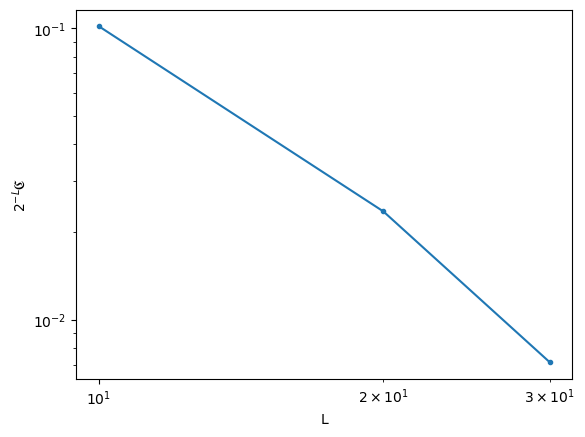

In [ ]:
plt.plot([10,20,30],[coh_m[x] for x in [10,20,30]],'.-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('L')
plt.ylabel('$2^{-L}\mathfrak{C}$')

In [ ]:
np.sqrt(2**L* (2**L-1) )

1073741823.5

In [ ]:
np.sqrt(2**L* (2**L) )

1073741824.0

In [ ]:
np.random.choice(np.hstack(df_MPS_0_T.xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.).xs(level='L',key=L).xs(level='t',key=2.).xs(level='Metrics',key='coh_mat').xs(level='maxbond',key=400)['observations']),size=2000,replace=True).mean()

0.006847272465728349

In [ ]:
df_MPS_0_T.xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.).xs(level='L',key=30).xs(level='t',key=2.).xs(level='Metrics',key='ranks').xs(level='seed',key=784)

,observations
maxbond,
400,5


In [ ]:
np.sqrt(df_MPS_0_T.xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.).xs(level='L',key=30).xs(level='t',key=2.).xs(level='Metrics',key='coh_mat').xs(level='seed',key=784).loc[4000]['observations']+1)

14968.12312760601

In [ ]:
14968.123127631503**2-1

224044708.96393707

In [ ]:
14968.123127606317**2-1

224044708.9631831

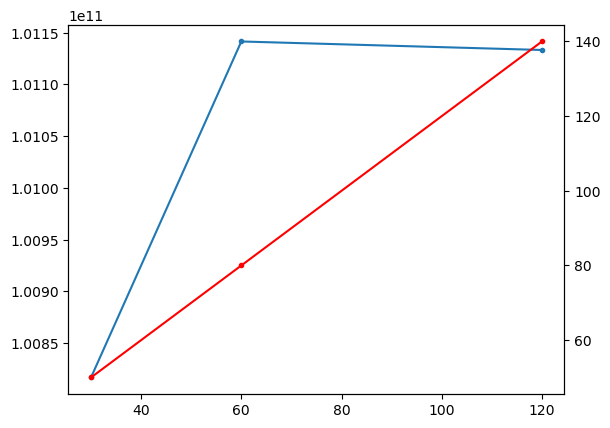

In [ ]:
fig,ax=plt.subplots()
ax.plot(df_MPS_0_T.xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.).xs(level='L',key=L).xs(level='t',key=2.).xs(level='Metrics',key='coh_mat').xs(level='seed',key=1361),'.-')
ax2=ax.twinx()
ax2.plot(df_MPS_0_T.xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.).xs(level='L',key=L).xs(level='t',key=2.).xs(level='Metrics',key='ranks').xs(level='seed',key=1361),'.-',color='r')

In [ ]:
df_MPS_0_T.xs(t,level='t').xs(p,level='p_ctrl').xs(L,level='L').xs(0.0,level='p_proj').xs(0,level='seed').index.get_level_values('maxbond').max()

1200

In [ ]:
params_list[0][1]['s']

array([   0,    1,    2, ..., 1997, 1998, 1999])

In [ ]:
import pandas as pd


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)

